### Machine Learning desarrollo estudio para Capital Ganso, S.A.
V_4.0

In [1]:
# En primer lugar, cargamos las librerías necesarias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [2]:
# Empezamos con la incorporación de los datos del fichero csv de Airbnb para generar nuestro dataset
# Y visualizamos los primeros elementos de forma transversal

airbnb_Data = pd.read_csv("./Data/airbnb_clean.csv", sep=";", decimal=".", quotechar=None, quoting=3)
airbnb_Data.drop(['ID'],
                 axis=1,inplace=True)
airbnb_Data.head(5).T

,0,1,2,3,4
Host Response Rate,84.0,100.0,100.0,100.0,100.0
Host Listings Count,3.0,1.0,2.0,8.0,2.0
Host Total Listings Count,3,1,2,8,2
Neighbourhood Group Cleansed,Retiro,Salamanca,Salamanca,Salamanca,Salamanca
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,28007,28001,28001,28001,28001
Country Code,ES,ES,ES,ES,ES
Country,Spain,Spain,Spain,Spain,Spain
Latitude,40.407,40.4259,40.4284,40.4275,40.4287
Longitude,-3.67089,-3.68165,-3.68715,-3.68576,-3.68542


In [3]:
#Calculamos el número de muestras y la dimensionalidad inicial.
N, d = airbnb_Data.shape
print(f'Numero de muestras actual es de {N} y la dimensionalidad es de {d}')

Numero de muestras actual es de 13239 y la dimensionalidad es de 40


In [4]:
#Procedemos a separar el Training y el Test, lo haremos generando dos datasets y los guardaremos
#en nuestro directorio ./Data para posteriormente cargarlos y procesarlos

from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_Data, test_size=0.20, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
# Guardamos físicamente en disco
train.to_csv('./Data/Airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./Data/Airbnb_test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (10591, 40)
Dimensiones del dataset de test: (2648, 40)


In [5]:
# A partir de este momento, cargaremos los datos de Training y trabajaremos con ellos para realizar la selección
# de características, los filtrados, los entrenamientos, etc.
# Y aplicaremos LAS MISMAS transformaciones que se hayan hecho en train (drop de columnas, filtros, generaciones, fill, etc) 

airbnb_train = pd.read_csv('./Data/Airbnb_train.csv', sep=';', decimal='.')

In [6]:
# A partir de este momento, cargaremos los datos de Test
# Y aplicaremos LAS MISMAS transformaciones que se hayan hecho en train (drop de columnas, filtros, generaciones, fill, etc) 

airbnb_test = pd.read_csv('./Data/Airbnb_test.csv', sep=';', decimal='.')

In [7]:
#Verificamos el nombre de de cada columna(dimensión)
feature_names = airbnb_train.columns[0:]
feature_names

Index(['Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Neighbourhood Group Cleansed', 'City',
       'Zipcode', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Square Feet', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [8]:
# En esta celda, filtraremos las poblaciones que contengan Madrid
# El csv descargado debía contener únicamente datos pertenecientes a Madrid

#Borramos todos los valores nulo en City
airbnb_train.dropna(subset=['City'],inplace=True)

#Cargamos el Dataset con las poblaciones que contengan Madrid no teniendo en cuenta mayúsculas y minúsculas.
airbnb_train = airbnb_train[airbnb_train["City"].str.contains('Madrid', na=False, case=False) ]

#Mostramos un conteo de todos los resultados agrupados por City
airbnb_train["City"].value_counts()

Madrid                                 10557
Madrid, Comunidad de Madrid, ES           16
madrid                                     7
MADRID                                     2
las matas  madrid                          1
Aravaca (Madrid)                           1
Madrid, Vallecas (Fontarrón)               1
Delicias-Madrid                            1
Comunidad de Madrid                        1
Centro, Madrid                             1
Madrid, Comunidad de Madrid, ESPANA        1
Name: City, dtype: int64

In [9]:
# Y haremos el mismo tratamiento de filtrado de población Madrid al dataset de test
#Borramos todos los valores nulo en City
airbnb_test.dropna(subset=['City'],inplace=True)

#Cargamos el Dataset con las poblaciones que contengan Madrid no teniendo en cuenta mayúsculas y minúsculas.
airbnb_test = airbnb_test[airbnb_test["City"].str.contains('Madrid', na=False, case=False) ]

In [10]:
print('Datos airbnb antes del borrado de NaN en Price: ', airbnb_train.shape)

Datos airbnb antes del borrado de NaN en Price:  (10589, 40)


In [11]:
#Nuestro target es el precio, por lo tanto no podemos admitir registros sin precio en train
airbnb_train.dropna(subset=['Price'],inplace=True)

In [12]:
# Y lo mismo aplicamos a test
airbnb_test.dropna(subset=['Price'],inplace=True)

In [13]:
print('Datos airbnb después del borrado de NaN en Price: ', airbnb_train.shape)

Datos airbnb después del borrado de NaN en Price:  (10587, 40)


In [14]:
#Categorizamos las variables que intuitivamente creemos pueden tener influencia en el resultado final
#En el dataset de Training

# opción con LabelEncoder
from sklearn import preprocessing
le0 = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le5 = preprocessing.LabelEncoder()
le6 = preprocessing.LabelEncoder()
le7 = preprocessing.LabelEncoder()


airbnb_train['Property Type'].fillna('nan', inplace = True)
le0.fit(airbnb_train['Property Type'])
airbnb_train['Property Type'] = le0.transform(airbnb_train['Property Type'])

airbnb_train['Bed Type'].fillna('nan', inplace = True)
le1.fit(airbnb_train['Bed Type'])
airbnb_train['Bed Type'] = le1.transform(airbnb_train['Bed Type'])

airbnb_train['Room Type'].fillna('nan', inplace = True)
le2.fit(airbnb_train['Room Type'])
airbnb_train['Room Type'] = le2.transform(airbnb_train['Room Type'])

airbnb_train['Cancellation Policy'].fillna('nan', inplace = True)
le4.fit(airbnb_train['Cancellation Policy'])
airbnb_train['Cancellation Policy'] = le4.transform(airbnb_train['Cancellation Policy'])

airbnb_train['Neighbourhood Group Cleansed'].fillna('nan', inplace = True)
le6.fit(airbnb_train['Neighbourhood Group Cleansed'])
airbnb_train['Neighbourhood Group Cleansed'] = le6.transform(airbnb_train['Neighbourhood Group Cleansed'])

airbnb_train['Zipcode'].fillna('00000', inplace = True)
le7.fit(airbnb_train['Zipcode'])
airbnb_train['Zipcode'] = le7.transform(airbnb_train['Zipcode'])


print(list(le0.classes_))
print(list(le1.classes_))
print(list(le2.classes_))
print(list(le4.classes_))
print(list(le6.classes_))
print(list(le7.classes_))
print(list(le7.classes_))

['Apartment', 'Bed & Breakfast', 'Boat', 'Boutique hotel', 'Camper/RV', 'Casa particular', 'Chalet', 'Condominium', 'Dorm', 'Earth House', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Loft', 'Other', 'Serviced apartment', 'Tent', 'Timeshare', 'Townhouse', 'Villa']
['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed']
['Entire home/apt', 'Private room', 'Shared room']
['flexible', 'moderate', 'strict', 'super_strict_60']
['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín', 'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza', 'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaverde']
['00000', '20013', '20126', '25008', '27004', '27013', '28001', '280013', '28002', '28003', '28004', '28005', '28006', '28007', '28008', '28009', '28010', '28011', '28012', '28013', '28014', '28015', '28016', '28017', '28018', '28019', '28020', '28021', '2

In [15]:
#Categorizamos las variables 
#En el dataset de Test con el mismo criterio que en train

#Está mal según el último mesaje de Slack de Ruben donde se ha aclarado que la categorización de Test,
#se debe hacer en base a los valores asignados en train y en el supuesto de no existir alguna de las categorías 
#de test en train,se aplicará la media.

#Lo dejo tal y como lo tenía inicialmente, para seguir con el proyecto, después de varias horas, no he encontrado
#la forma de solucionarlo.

# opción con LabelEncoder
from sklearn import preprocessing
le0t = preprocessing.LabelEncoder()
le1t = preprocessing.LabelEncoder()
le2t = preprocessing.LabelEncoder()
le4t = preprocessing.LabelEncoder()
le5t = preprocessing.LabelEncoder()
le6t = preprocessing.LabelEncoder()
le7t = preprocessing.LabelEncoder()

airbnb_test['Property Type'].fillna('nan', inplace = True)
le0t.fit(airbnb_test['Property Type'])
airbnb_test['Property Type'] = le0t.transform(airbnb_test['Property Type'])

airbnb_test['Bed Type'].fillna('nan', inplace = True)
le1t.fit(airbnb_test['Bed Type'])
airbnb_test['Bed Type'] = le1t.transform(airbnb_test['Bed Type'])

airbnb_test['Room Type'].fillna('nan', inplace = True)
le2t.fit(airbnb_test['Room Type'])
airbnb_test['Room Type'] = le2t.transform(airbnb_test['Room Type'])

airbnb_test['Cancellation Policy'].fillna('nan', inplace = True)
le4t.fit(airbnb_test['Cancellation Policy'])
airbnb_test['Cancellation Policy'] = le4t.transform(airbnb_test['Cancellation Policy'])

airbnb_test['Neighbourhood Group Cleansed'].fillna('nan', inplace = True)
le6t.fit(airbnb_test['Neighbourhood Group Cleansed'])
airbnb_test['Neighbourhood Group Cleansed'] = le6t.transform(airbnb_test['Neighbourhood Group Cleansed'])

airbnb_test['Zipcode'].fillna('00000', inplace = True)
le7t.fit(airbnb_test['Zipcode'])
airbnb_test['Zipcode'] = le7t.transform(airbnb_test['Zipcode'])

In [16]:
airbnb_train.head(5).T

,0,1,2,3,4
Host Response Rate,100.0,100.0,100.0,100.0,25.0
Host Listings Count,1.0,1.0,1.0,1.0,1.0
Host Total Listings Count,1,1,1,1,1
Neighbourhood Group Cleansed,4,4,3,13,3
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,8,42,10,20,18
Country Code,ES,ES,ES,ES,ES
Country,Spain,Spain,Spain,Spain,Spain
Latitude,40.4451,40.4632,40.425,40.407,40.4094
Longitude,-3.67703,-3.68398,-3.69731,-3.6844,-3.69421


In [17]:
#Creamos una matriz de correlación y posteriormente lo representamos graficamente para poder tomar la mejor decición.
airbnb_train.corr()

,Host Total Listings Count,Neighbourhood Group Cleansed,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,...,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
Host Total Listings Count,1.000000,-0.030226,-0.080335,0.003091,-0.041357,-0.086357,-0.111385,0.121634,0.147553,0.070069,...,-0.092265,-0.174706,-0.061559,-0.232752,-0.211525,-0.018373,-0.149123,0.243852,0.923248,-0.127452
Neighbourhood Group Cleansed,-0.030226,1.000000,0.185672,0.147225,0.330516,0.051033,0.109843,-0.063172,0.006923,0.027381,...,-0.147078,-0.033775,-0.038852,-0.026519,-0.024231,-0.242755,-0.044422,-0.073734,-0.031713,-0.137001
Zipcode,-0.080335,0.185672,1.000000,0.058214,0.283448,0.085360,0.176265,-0.100189,-0.029645,-0.009909,...,-0.084945,0.006929,0.006511,0.017047,0.001085,-0.289185,0.016530,-0.111615,-0.076821,-0.060666
Latitude,0.003091,0.147225,0.058214,1.000000,0.265296,0.037778,-0.008487,-0.001631,0.046957,0.032532,...,-0.063384,-0.001161,-0.005693,0.008619,0.003954,0.060251,-0.002191,-0.037333,0.006623,-0.070580
Longitude,-0.041357,0.330516,0.283448,0.265296,1.000000,0.046678,0.066720,-0.046900,0.003975,0.008259,...,-0.042763,0.028070,0.027911,0.016130,0.011369,-0.097805,0.020324,-0.066929,-0.045234,-0.014866
Property Type,-0.086357,0.051033,0.085360,0.037778,0.046678,1.000000,0.112484,-0.048536,0.028376,0.003765,...,-0.054676,-0.002437,-0.002517,-0.001917,-0.017847,-0.045050,-0.012813,-0.077723,-0.089096,-0.029735
Room Type,-0.111385,0.109843,0.176265,-0.008487,0.066720,0.112484,1.000000,-0.486844,0.019710,-0.243811,...,-0.136902,0.011277,-0.040807,0.003400,-0.023182,-0.112165,0.013780,-0.216913,-0.093483,-0.096678
Accommodates,0.121634,-0.063172,-0.100189,-0.001631,-0.046900,-0.048536,-0.486844,1.000000,0.340807,0.678641,...,0.082433,-0.069893,-0.027014,-0.076772,-0.060507,0.041477,-0.065770,0.227490,0.126207,0.042975
Bathrooms,0.147553,0.006923,-0.029645,0.046957,0.003975,0.028376,0.019710,0.340807,1.000000,0.435405,...,-0.058377,0.005034,-0.005871,-0.044560,-0.045163,0.039750,0.002380,0.113870,0.165932,-0.059220
Bedrooms,0.070069,0.027381,-0.009909,0.032532,0.008259,0.003765,-0.243811,0.678641,0.435405,1.000000,...,-0.025950,0.002436,-0.001780,-0.023027,-0.008976,-0.000171,-0.005905,0.093327,0.067987,-0.047098


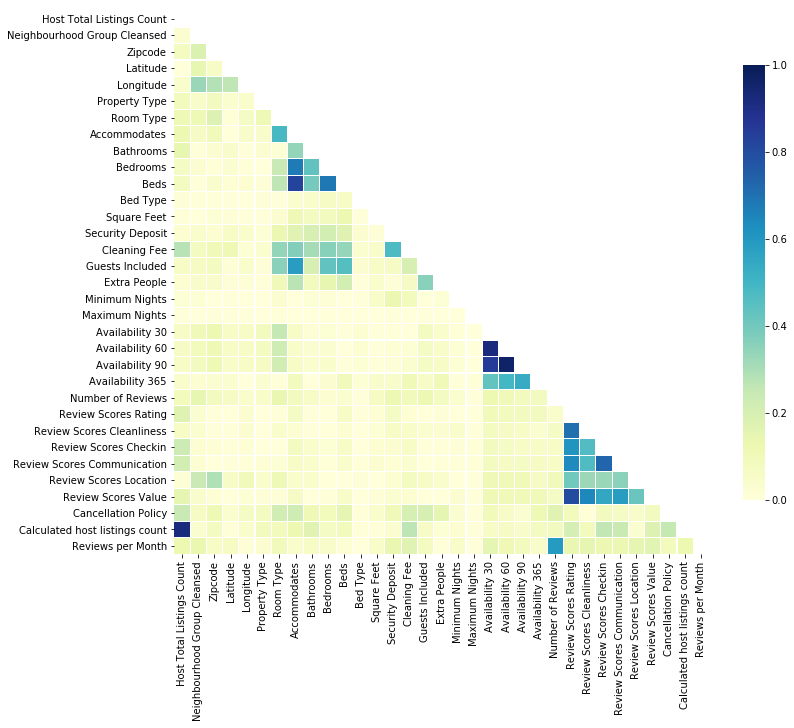

In [18]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [19]:
#Con esta matriz/gráfica anulamos variables que están fuertemente correladas en train y en test

airbnb_train.drop(['Host Listings Count','Host Total Listings Count','Accommodates','Availability 30'
                  , 'Availability 60', 'Availability 90','Availability 365','Review Scores Rating'
                  ,'Review Scores Accuracy','Review Scores Checkin','Host Listings Count'],
                 axis=1,inplace=True)

airbnb_test.drop(['Host Listings Count','Host Total Listings Count','Accommodates','Availability 30'
                  , 'Availability 60', 'Availability 90','Availability 365','Review Scores Rating'
                  ,'Review Scores Accuracy','Review Scores Checkin','Host Listings Count'],
                 axis=1,inplace=True)

In [20]:
#Una vez hemos aplicado todos los filtros hasta este momento y teniendo en cuenta que hemos 
#seleccionado solamente los datos de Madrid, las dimensiones de City,Country Code y Country, no las categorizamos
#y procedemos a hacer un drop de ellas.
airbnb_train.drop(['City','Country Code','Country'],
                 axis=1,inplace=True)

airbnb_test.drop(['City','Country Code','Country'],
                 axis=1,inplace=True)

In [21]:
#airbnb_train.head(5).T

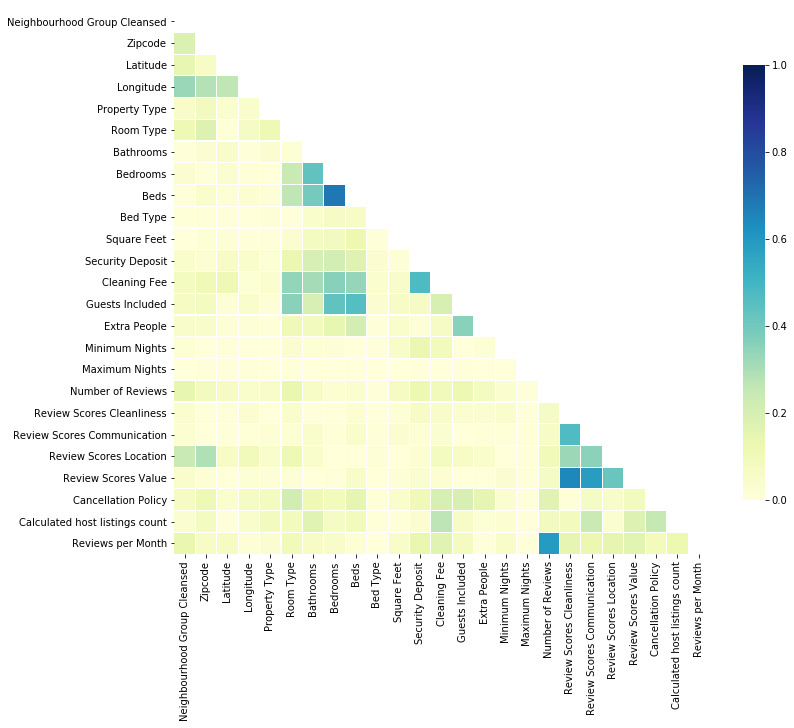

In [22]:
# Volvemos a mostrar la matriz de correlación y así comprobamos que todo ha mejorado

# Compute the correlation matrix
corr = np.abs(airbnb_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [23]:
airbnb_train["Host Response Rate"] = pd.to_numeric(airbnb_train["Host Response Rate"])
print (airbnb_train.dtypes)

Host Response Rate                float64
Neighbourhood Group Cleansed        int64
Zipcode                             int64
Latitude                          float64
Longitude                         float64
Property Type                       int64
Room Type                           int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                            int64
Square Feet                       float64
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                   float64
Extra People                      float64
Minimum Nights                    float64
Maximum Nights                    float64
Number of Reviews                 float64
Review Scores Cleanliness         float64
Review Scores Communication       float64
Review Scores Location            float64
Review Scores Value               

In [24]:
airbnb_test["Host Response Rate"] = pd.to_numeric(airbnb_test["Host Response Rate"])

In [25]:
#Reemplazamos todos los valores nulos del dataset con 0
airbnb_train.fillna(0, inplace = True)

#Lo mismo para el de test
airbnb_test.fillna(0, inplace = True)

In [26]:
#Hacemos la comprobación de que no nos han quedado valores nulos
airbnb_train.isnull().any()

Host Response Rate                False
Neighbourhood Group Cleansed      False
Zipcode                           False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Square Feet                       False
Price                             False
Security Deposit                  False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Number of Reviews                 False
Review Scores Cleanliness         False
Review Scores Communication       False
Review Scores Location            False
Review Scores Value               False
Cancellation Policy               False


In [27]:
airbnb_train.columns[0:]

Index(['Host Response Rate', 'Neighbourhood Group Cleansed', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Square Feet', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Cleanliness', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [28]:
#Una vez hemos determinado que dimensiones no van quedando, procedemos a cambiar el nombre de las columnas.
airbnb_train.columns = ['response_rate','barrios', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_met', 'Price', 'security_deposit', 'cleaning_fee',
       'guests_inc', 'extra_people', 'min_nights', 'max_nights',
       'num_reviews', 'rs_cleanliness',
       'rs_communication', 'rs_location',
       'rs_value', 'cancellation_policy',
       'calculated_host', 'reviews_month']

airbnb_test.columns = ['response_rate','barrios', 'zipcode', 'latitude','longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_met', 'Price', 'security_deposit', 'cleaning_fee',
       'guests_inc', 'extra_people', 'min_nights', 'max_nights',
       'num_reviews', 'rs_cleanliness',
       'rs_communication', 'rs_location',
       'rs_value', 'cancellation_policy',
       'calculated_host', 'reviews_month']

In [29]:
#Ejecutamos un describe para filtrar los outliers
airbnb_train.describe().T

,count,mean,std,min,25%,50%,75%,max
response_rate,10587.0,82.902144,34.563269,0.000000,90.000000,100.000000,100.000000,100.000000
barrios,10587.0,5.661566,4.717710,0.000000,3.000000,3.000000,8.000000,20.000000
zipcode,10587.0,20.279021,12.841319,0.000000,11.000000,18.000000,21.000000,69.000000
latitude,10587.0,40.420512,0.019967,40.331888,40.410110,40.418668,40.427796,40.562736
longitude,10587.0,-3.697232,0.023329,-3.863907,-3.707799,-3.701634,-3.693784,-3.573613
property_type,10587.0,1.799660,4.409855,0.000000,0.000000,0.000000,0.000000,20.000000
room_type,10587.0,0.411070,0.519870,0.000000,0.000000,0.000000,1.000000,2.000000
bathrooms,10587.0,1.248418,0.597136,0.000000,1.000000,1.000000,1.000000,8.000000
bedrooms,10587.0,1.298385,0.834750,0.000000,1.000000,1.000000,2.000000,10.000000
beds,10587.0,1.991027,1.531092,0.000000,1.000000,2.000000,2.000000,16.000000


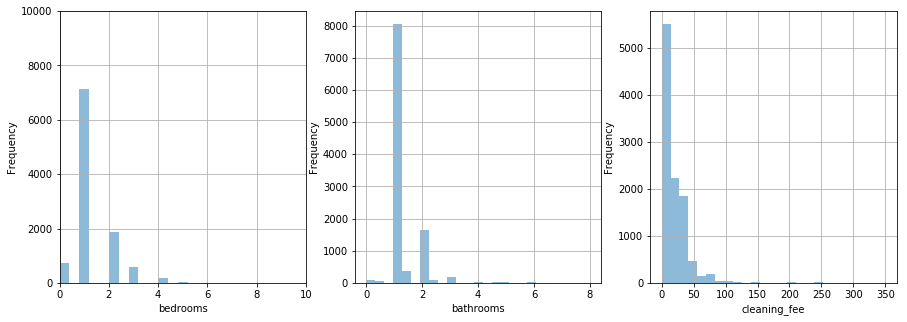

In [30]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_train['bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 10, 0, 10000])
plt.xlabel('bedrooms')

plt.subplot(1,3,2)
airbnb_train['bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('bathrooms')

plt.subplot(1,3,3)
airbnb_train['cleaning_fee'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('cleaning_fee')

plt.show()

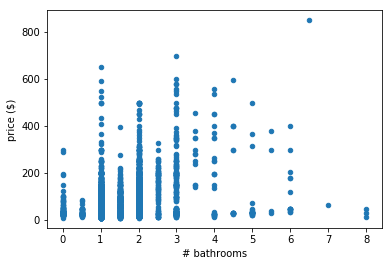

In [31]:
airbnb_train.plot(kind = 'scatter',x='bathrooms',y = 'Price')
plt.xlabel('# bathrooms')
plt.ylabel('price ($)')
plt.show()

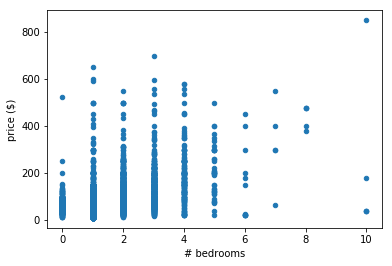

In [32]:
airbnb_train.plot(kind = 'scatter',x='bedrooms',y = 'Price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

In [33]:
#pd.plotting.scatter_matrix(airbnb_train, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
#plt.show()

In [34]:
#Procedemos a eliminar outliers de Price<=500 bedrooms<=5 bathrooms<=5
my_filter1 = airbnb_train['Price']<=500
my_filter2 = airbnb_train['bedrooms']<=5
my_filter3 = airbnb_train['bathrooms']<=5
airbnb_train = airbnb_train[my_filter1]
airbnb_train = airbnb_train[my_filter2]
airbnb_train = airbnb_train[my_filter3]

#También para test
my_filter1t = airbnb_test['Price']<=500
my_filter2t = airbnb_test['bedrooms']<=5
my_filter3t = airbnb_test['bathrooms']<=5
airbnb_test = airbnb_test[my_filter1t]
airbnb_test = airbnb_test[my_filter2t]
airbnb_test = airbnb_test[my_filter3t]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


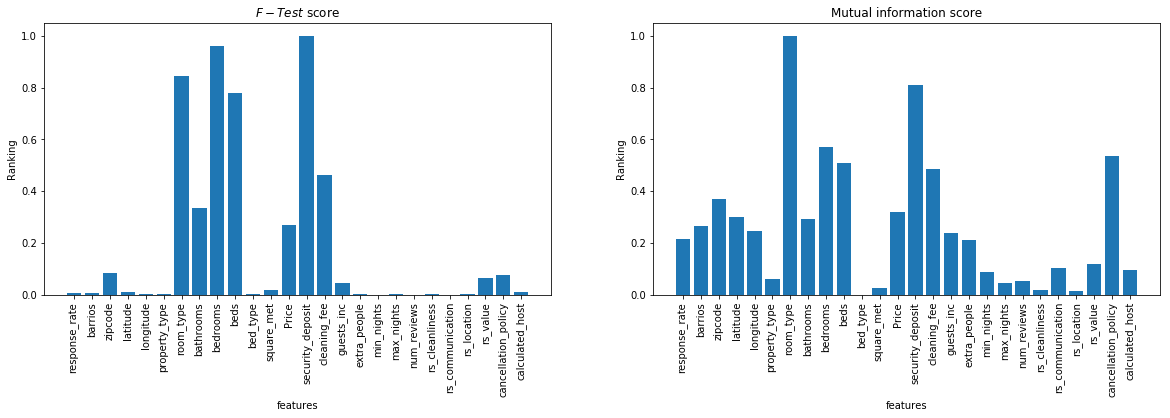

In [35]:
# convertimos el DataFrame al formato necesario para scikit-learn
#data_train = airbnb_train.values 
from sklearn.feature_selection import f_regression, mutual_info_regression

y_train = airbnb_train['Price'].values   # nos quedamos con la columna Price
X_train = airbnb_train[airbnb_train.columns.drop(['Price'])].values # nos quedamos con el resto

feature_names = airbnb_train.columns[0:]


# do calculations
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [36]:
#Vistos los datos de las gráficas, bed_type y square_met no son muy relevantes. square_met, en los filtros anteriores,
#observamos que la mayoría de registros venían como nulos y esto puede ser la causa de la poca relevancia
#procedemos a eliminar estas dos dimensiones.
airbnb_train.drop(['bed_type','square_met'],
                 axis=1,inplace=True)

airbnb_test.drop(['bed_type','square_met'],
                 axis=1,inplace=True)

In [37]:
#Ahora vamos a utilizar en la selección de características un método embeded combinado con lasso

In [38]:
#y_train = np.log10(airbnb_train['Price'].values )  # nos quedamos con la columna Price
y_train = airbnb_train['Price'].values  # nos quedamos con la columna Price
X_train = airbnb_train[airbnb_train.columns.drop(['Price'])].values # nos quedamos con el resto

#Ahora definimos las variables de x y de test
#y_test = np.log10( airbnb_test['Price'].values )  # nos quedamos con la columna Price de test
y_test =  airbnb_test['Price'].values   # nos quedamos con la columna Price de test
X_test = airbnb_test[airbnb_test.columns.drop(['Price'])].values # nos quedamos con el resto de test

feature_names = airbnb_train[airbnb_train.columns.drop(['Price'])].columns
#feature_names = airbnb_train.columns[0:]
print('Datos entrenamiento: ', airbnb_train.shape)
print('Datos test: ', airbnb_test.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

Datos entrenamiento:  (10531, 25)
Datos test:  (2633, 25)


In [39]:
# Escalamos (con los datos de test)
# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

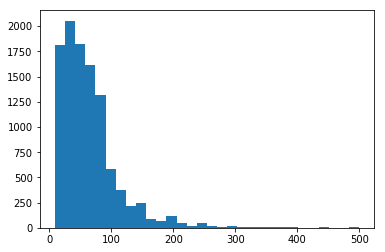

In [40]:
plt.hist(airbnb_train.Price, bins=30)
plt.show()

En este caso, utilizamos la capacidad de Lasso para seleccionar variable

best mean cross-validation score: -1210.579
best parameters: {'alpha': 0.1}


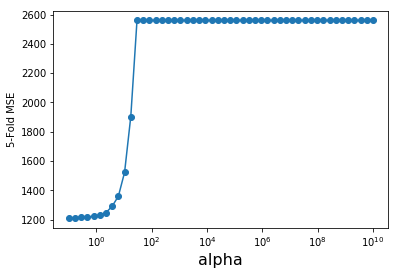

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']*12
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

#Al error cuadratico medio le hacemos la raiz cuadrada para determinar si el valor tiene lógica o bien hay que regularizar más
print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)



MSE Modelo Lasso (train): 1.22e+03
MSE Modelo Lasso (test) : 1.14e+03
RMSE Modelo Lasso (train): 35
RMSE Modelo Lasso (test) : 33.7
response_rate -0.25745739757212327
barrios -0.0
zipcode -2.8953884275003965
latitude 0.5999209628154736
longitude 0.0
property_type 0.0
room_type -14.173265223956468
bathrooms 6.219603614217013
bedrooms 10.138901223859808
beds 5.773440132739504
security_deposit 0.0
cleaning_fee 12.195330541534044
guests_inc 1.8872328898157573
extra_people -0.0
min_nights -0.0
max_nights -0.0
num_reviews -0.0
rs_cleanliness -0.0
rs_communication -2.274281789715638
rs_location -0.0
rs_value -0.0
cancellation_policy -0.0
calculated_host 0.0
reviews_month -2.3324360121969807


In [43]:
#Los resultados con alpha * 12 creo que no son muy correctos 
#y vemos que podemos proceder a una reducción de características

Con este algoritmo hemos conseguido desactivar algunas variables (barrios, longitude, property_type, security_deposit, extra_people,max_nights,num_reviews,rs_cleanliness,rs_location,rs_value,cancellation_policy
,calculated_host), lo que mejora la interpretabilidad del modelo a ajustando al máximo el error entre train y test.

Vamos a aumentar el parámetro de regularización con alpha * 12 y observar los resultados obtenidos:

Hemos aumentado un poco el error, pero a cambio:
Tenemos un modelo más sencillo (menos variables al haber muchos coeficientes nulos) y por tanto, menos susceptible a sufrir overfitting
La diferencia entra train y test ha disminuido.
Mejoramos la interpretabilidad del modelo, las variables supervivientes (con coeficiente distintos de cero) parecen coincidir en las que pensamos que son mejores para resolver nuestro problema.


In [44]:
#Esta celda la comentamos entera. Hemos intentado reducir dimensionalidad. Según el método embeded con lasso
#que hemos utilizado y no hemos obtenido grandes mejoras.


#En la versión 3 del dataset, los datos no son muy buenos, vamos a intentar reducir dimensionalidad según nuestros
#Cálculos con Lasso

#airbnb_train.drop(['barrios','longitude','property_type','security_deposit','extra_people','max_nights'
                 #  ,'num_reviews','rs_cleanliness', 'rs_location','rs_value','cancellation_policy','calculated_host'],
                 #axis=1,inplace=True)

#airbnb_test.drop(['barrios','longitude','property_type','security_deposit','extra_people','max_nights'
                   #,'num_reviews','rs_cleanliness', 'rs_location','rs_value','cancellation_policy','calculated_host'],
                 #axis=1,inplace=True)

### Random Forest

In [45]:
# Convertimos el DataFrame al formato necesario para scikit-learn
y_train = airbnb_train['Price'].values  # nos quedamos con la columna Price
X_train = airbnb_train[airbnb_train.columns.drop(['Price'])].values # nos quedamos con el resto

#Ahora definimos las variables de x y de test
y_test =  airbnb_test['Price'].values   # nos quedamos con la columna Price de test
X_test = airbnb_test[airbnb_test.columns.drop(['Price'])].values # nos quedamos con el resto de test

feature_names = airbnb_train[airbnb_train.columns.drop(['Price'])].columns

print('Datos entrenamiento: ', airbnb_train.shape)
print('Datos test: ', airbnb_test.shape)

# Escalamos (con los datos de train)
#scaler = preprocessing.StandardScaler().fit(X_train)
#XtrainScaled = scaler.transform(X_train)

Datos entrenamiento:  (10531, 25)
Datos test:  (2633, 25)


best mean cross-validation score: 0.660
best parameters: {'max_depth': 14}


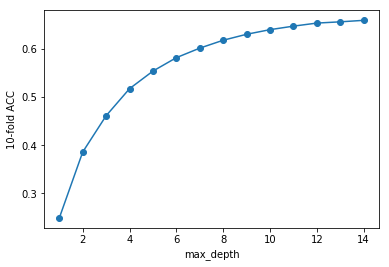

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [50]:
#maxDepthOptimo = grid.best_params_['max_depth']
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=7,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Score Train: ",bagModel.score(X_train,y_train))
print("Score Test: ",bagModel.score(X_test,y_test))

Score Train:  0.6641617509421397
Score Test:  0.5904014722591976


. En este caso el max_depth con valor 14, que es el resultado óptimo que obtenemos, vemos que la diferencia entre train y test es muy elevada por lo que estamos provocando overfitting. El elquilbrio lo tendríamos entre 7 y 8 donde conseguimos los mejores resultados.

Nota: Cada vez que lo ejecuto de nuevo, los resultados varían un poco y a veces hay que jugar con la variable max_depth.

Este es uno de los resultados obtenidos donde la diferencia entre train y test no es muy alta.

Score Train:  0.6501419182124624

Score Test:  0.6372394472665663

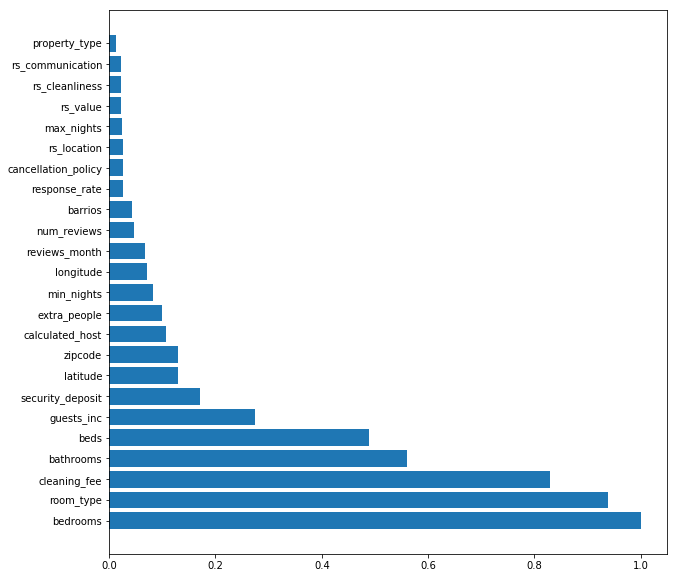

In [51]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

En esta gráfica mostraremos la improtancia de cada variable respecto al "Price"

### Boosted Trees
Vamos a analizar el funcionamiento de los métodos de Gradient Boosting.

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [100,200,500,1000] # se puede probar a aumentar este número
learningRate = [0.1,0.05] # se puede probar a disminuir este número
#Niterations = [500,1000,1500,2000] # se puede probar a aumentar este número
#learningRate = [0.1,0.05] # se puede probar a disminuir este número
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.661
best parameters: {'learning_rate': 0.1, 'n_estimators': 500}


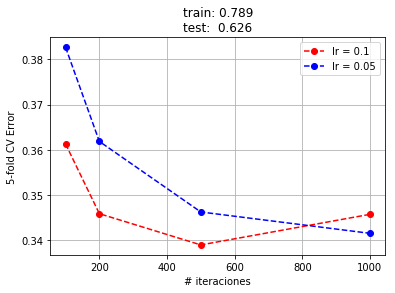

In [53]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

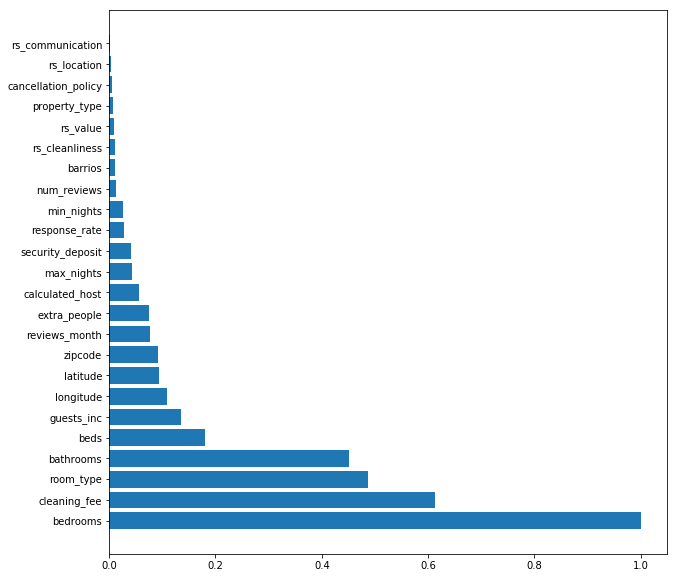

In [54]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

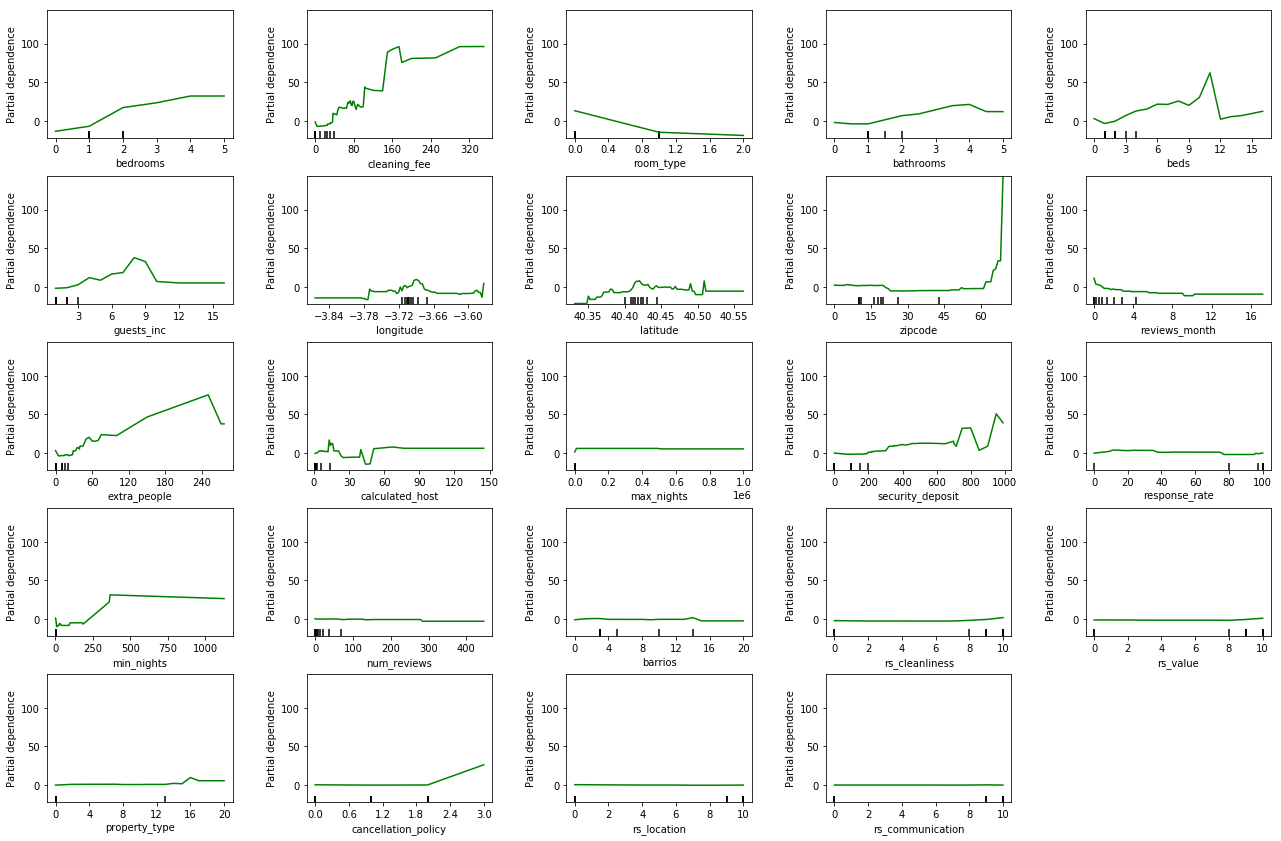

In [55]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig, ax = plot_partial_dependence(bt, X_train, indices, feature_names=feature_names,
                                 percentiles=(0.0, 1.0), n_cols = 5)
fig.set_size_inches(20, 20)
plt.show()

### SVM en regresión

In [56]:
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled  = scaler.transform(X_test)

In [57]:
from sklearn.svm import SVR

# Paso 2:
array_C = np.logspace(-2, 2, 10)
array_gamma = np.logspace(-5, 1, 8)

param_grid = {'C': array_C, 'gamma':array_gamma}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 43.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02]), 'gamma': array([1.00000e-05, 7.19686e-05, 5.17947e-04, 3.72759e-03, 2.68270e-02,
       1.93070e-01, 1.38950e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

best mean cross-validation score: 0.617
best parameters: {'C': 100.0, 'gamma': 0.026826957952797246}


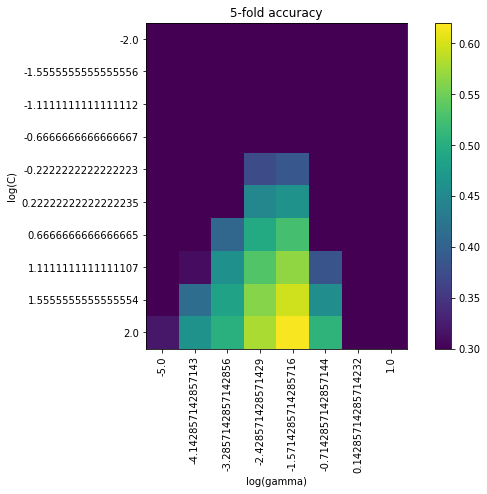

In [59]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(array_C),len(array_gamma))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.3, vmax=0.62)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(array_gamma)), np.log10(array_gamma), rotation=90)
plt.yticks(np.arange(len(array_C)), np.log10(array_C))
plt.title('5-fold accuracy')
plt.show()

In [60]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

Acc (TEST): 0.60


In [61]:
#Los resultados no han sido muy buenos, pero después de hacer diferentes pruebas con diferentes 
#modelos es lo máximo que he conseguido en TEST es el resultado Acc (TEST): 0.64 en SVM

En este proyecto se ha hecho 4 versiones distintas, donde se han realizado varias pruebas para buscar la mejor
combinación de variables para obtener los mejores resultados. Mi inexperiencia me ha llevado a dedicarle muchas horas
con unos resultados no muy buenos. Hasta aquí he podido llegar.

Ahora procederemos a guardar nuesto modelo para ser utilizado para realizar nuestras predicciones de precios de alquiler.
Utilizaremos el API de joblib para una eficiente serialización de objetos de Python con arrays de Numpy.


In [64]:
pip install joblib

    100% |████████████████████████████████| 296kB 2.0MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [70]:
# Save Model Using joblib
from sklearn import model_selection
from joblib import dump
import joblib
# Guardamos el modelo en disco
filename = './ModelosFinales/finalized_modelML_SVM.sav'
joblib.dump(svmModel, filename)
 
# Prueba de carga del modelo guardado
 
# Cargamos el modelo desde el disco
loaded_model = joblib.load(filename)
result = loaded_model.score(XtestScaled,y_test)
print(result)

0.5965217598745729


In [71]:
# Hacemos predicciones
predict = loaded_model.predict(XtestScaled)
print(predict)

[ 14.77935619  53.4381962   33.12417815 ...  51.88585956  33.36818397
 111.93046944]
